In [1]:
# ANOVA to test effects of income group on sleep duration (weekday & weekend), followed by Tukey HSD if significant.

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('DailyActivitiesPreProcessed.csv')
df 

,Gender,Age,Occupation,Marital status,HouseHoldIncome,Weekday_05:00-05:30,Weekday_05:30-06:00,Weekday_06:00-06:30,Weekday_06:30-07:00,Weekday_07:00-07:30,...,Weekday_Breakfast_time,Weekend_Breakfast_time,Weekday_Lunch_time,Weekend_Lunch_time,Weekday_Dinner_time,Weekend_Dinner_time,Productivity_score_weekday,Productivity_score_weekend,Activity_Level_weekday,Activity_Level_weekend
0,Female,23,Student,Single,0.0,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,...,08:30-09:00,NaN,NaN,NaN,18:00-18:30,23:00-23:30,0.437500,0.270833,Moderate,Moderate
1,Female,23,Student,Single,100000.0,Sleeping,Sleeping,Personal Care,Personal Care,Eating,...,07:00-07:30,07:30-08:00,12:00-12:30,13:00-13:30,20:30-21:00,20:30-21:00,0.312500,0.291667,Low,Moderate
2,Female,25,Student,Single,200000.0,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,...,NaN,NaN,NaN,13:00-13:30,20:30-21:00,21:00-21:30,0.291667,0.020833,Low,Low
3,Male,23,Student,Single,100000.0,Sleeping,Sleeping,Sleeping,Sleeping,Eating,...,07:00-07:30,NaN,12:30-13:00,12:00-12:30,21:00-21:30,NaN,0.312500,0.270833,Low,Moderate
4,Male,23,Student,Single,90000.0,Religion or Spiritual Activities,Sleeping,Sleeping,Sleeping,Sleeping,...,08:00-08:30,NaN,13:30-14:00,13:30-14:00,20:30-21:00,20:30-21:00,0.291667,0.333333,Low,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Male,23,Student,Single,0.0,Sleeping,Sleeping,Sleeping,Sleeping,Work,...,07:30-08:00,08:30-09:00,NaN,NaN,21:00-21:30,20:00-20:30,0.270833,0.229167,Low,Moderate
219,Male,23,Student,Single,100000.0,Sleeping,Sleeping,Personal Care,Housework,Exercise,...,08:00-08:30,08:30-09:00,NaN,13:30-14:00,18:30-19:00,18:00-18:30,0.395833,0.104167,Moderate,Low
220,Female,25,Student,Single,0.0,Religion or Spiritual Activities,Sleeping,Sleeping,Sleeping,Sleeping,...,08:00-08:30,08:00-08:30,NaN,NaN,22:30-23:00,22:30-23:00,0.333333,0.229167,Moderate,Moderate
221,Male,23,Student,Single,100000.0,Religion or Spiritual Activities,Housework,Exercise,Exercise,Study,...,NaN,NaN,NaN,NaN,NaN,NaN,0.520833,0.354167,High,High


In [3]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA for Sleep Duration (Weekday) based on Income Group
formula_weekday = 'Sleeping_duration_weekday ~ C(IncomeGroup)'
model_weekday = ols(formula_weekday, data=df).fit()
anova_table_weekday = sm.stats.anova_lm(model_weekday, typ=2)

print("ANOVA for Sleep Duration (Weekday) based on Income Group:")
print(anova_table_weekday)

# If the ANOVA is significant for 'IncomeGroup', perform Tukey HSD
if anova_table_weekday['PR(>F)']['C(IncomeGroup)'] < 0.05:
    tukey_result_weekday = pairwise_tukeyhsd(df['Sleeping_duration_weekday'], df['IncomeGroup'])
    print("\nTukey HSD Test Results (Weekday) - Sleep Duration by Income Group:")
    print(tukey_result_weekday)
else:
    print("\nNo significant differences found in the ANOVA for Sleep Duration (Weekday) by Income Group.")

# ANOVA for Sleep Duration (Weekend) based on Income Group
formula_weekend = 'Sleeping_duration_weekend ~ C(IncomeGroup)'
model_weekend = ols(formula_weekend, data=df).fit()
anova_table_weekend = sm.stats.anova_lm(model_weekend, typ=2)

print("\nANOVA for Sleep Duration (Weekend) based on Income Group:")
print(anova_table_weekend)

# If the ANOVA is significant for 'IncomeGroup', perform Tukey HSD
if anova_table_weekend['PR(>F)']['C(IncomeGroup)'] < 0.05:
    tukey_result_weekend = pairwise_tukeyhsd(df['Sleeping_duration_weekend'], df['IncomeGroup'])
    print("\nTukey HSD Test Results (Weekend) - Sleep Duration by Income Group:")
    print(tukey_result_weekend)
else:
    print("\nNo significant differences found in the ANOVA for Sleep Duration (Weekend) by Income Group.")


ANOVA for Sleep Duration (Weekday) based on Income Group:
                    sum_sq     df         F    PR(>F)
C(IncomeGroup)   24.766635    2.0  3.617622  0.028456
Residual        753.071930  220.0       NaN       NaN

Tukey HSD Test Results (Weekday) - Sleep Duration by Income Group:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2  meandiff p-adj   lower  upper  reject
-----------------------------------------------------
  High      Low  -0.4873 0.3724 -1.3429 0.3683  False
  High Moderate   0.3022 0.6165 -0.4576  1.062  False
   Low Moderate   0.7895 0.0211  0.0963 1.4828   True
-----------------------------------------------------

ANOVA for Sleep Duration (Weekend) based on Income Group:
                     sum_sq     df         F    PR(>F)
C(IncomeGroup)     7.830102    2.0  0.556342  0.574107
Residual        1548.167656  220.0       NaN       NaN

No significant differences found in the ANOVA for Sleep Duration (Weekend) by Income Group.


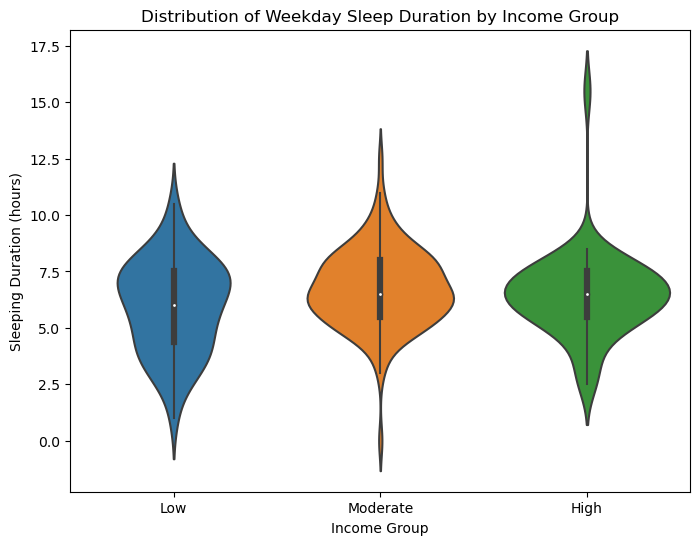

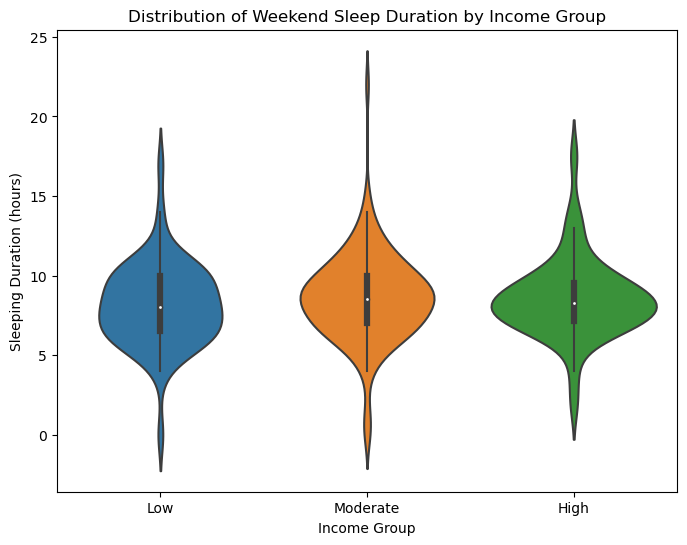

In [4]:
# Violin plot for Weekday Sleep Duration by Income Group
plt.figure(figsize=(8,6))
sns.violinplot(x='IncomeGroup', y='Sleeping_duration_weekday', data=df)
plt.title('Distribution of Weekday Sleep Duration by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Sleeping Duration (hours)')
plt.show()

# Violin plot for Weekend Sleep Duration by Income Group
plt.figure(figsize=(8,6))
sns.violinplot(x='IncomeGroup', y='Sleeping_duration_weekend', data=df)
plt.title('Distribution of Weekend Sleep Duration by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Sleeping Duration (hours)')
plt.show()
